<a href="https://colab.research.google.com/github/SridharaniKatipally/Diabetes-prediction-using-ML/blob/main/diabetes(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

In [18]:
data.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [19]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

In [20]:
# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']


In [21]:
# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64


In [24]:
# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

In [25]:
# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)


CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64


In [26]:
# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [28]:
# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Initialize and train the Random Forest model with StratifiedKFold
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [30]:
# Best model
best_rf = grid_search.best_estimator_

In [31]:
# Predictions
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

In [36]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9940476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           2       1.00      1.00      1.00       164
           3       1.00      0.97      0.99       160
           4       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



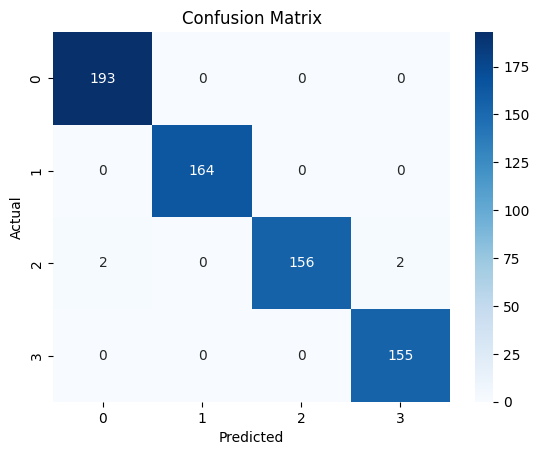

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Feature Importance
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

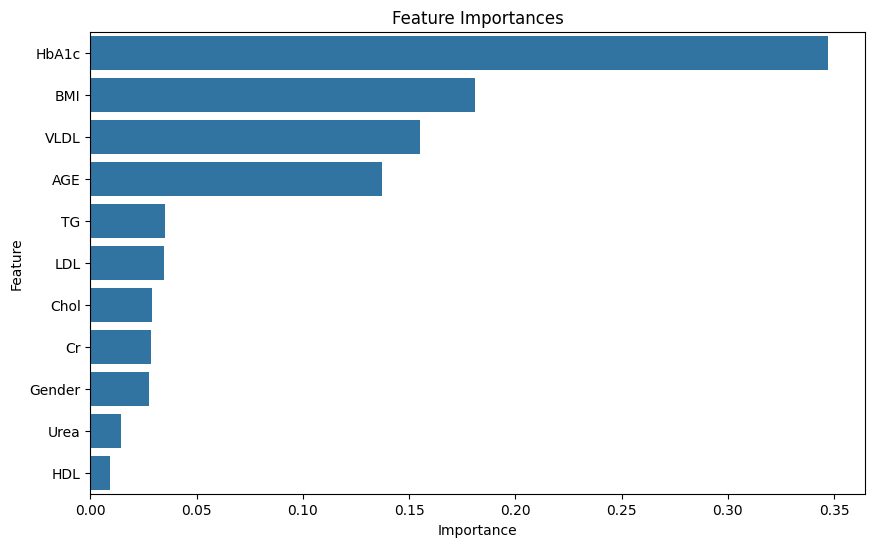

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [40]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

In [42]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

In [43]:
# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

In [44]:
# Check the class distribution
class_counts = y.value_counts()
print("Class distribution before removing class 1:\n", class_counts)

Class distribution before removing class 1:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64


In [48]:
# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [50]:
# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:

# Initialize and train the SVM model with StratifiedKFold
svm = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [52]:

# Best model
best_svm = grid_search.best_estimator_

In [53]:
# Predictions
y_pred = best_svm.predict(X_test)
y_pred_prob = best_svm.predict_proba(X_test)[:, 1]

In [59]:

# Evaluation
print("Accuracy of SVM:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy of SVM: 0.9895833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           2       0.99      1.00      0.99       164
           3       1.00      0.96      0.98       160
           4       0.97      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



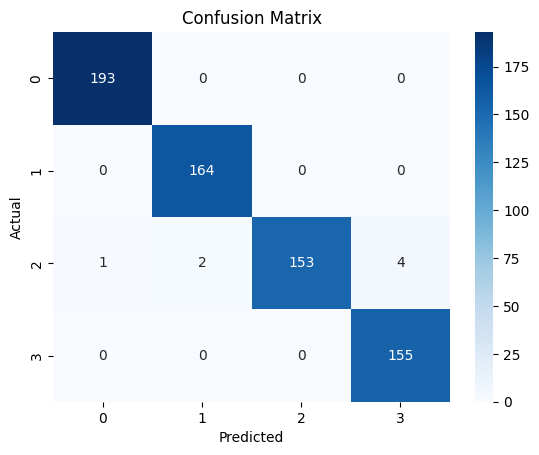

In [58]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [65]:
#Extreme Gradient Boosting (XGBoost)
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

In [67]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

In [68]:
# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

In [69]:

# Check the class distribution
class_counts = y.value_counts()
print("Class distribution before removing class 1:\n", class_counts)

Class distribution before removing class 1:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64


In [70]:
# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

In [71]:
# Re-encode the class labels to make them consecutive integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [72]:
# Check the class distribution again
class_counts = pd.Series(y).value_counts()
print("Class distribution after re-encoding:\n", class_counts)

Class distribution after re-encoding:
 2    840
0    102
1     53
3      4
Name: count, dtype: int64


In [74]:
# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [76]:
# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
# Initialize and train the XGBoost model with StratifiedKFold
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     impor...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [78]:
# Best model
best_xgb = grid_search.best_estimator_

In [79]:
# Predictions
y_pred = best_xgb.predict(X_test)
y_pred_prob = best_xgb.predict_proba(X_test)

In [80]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))

Accuracy: 0.9940476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           1       1.00      1.00      1.00       164
           2       1.00      0.97      0.99       160
           3       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672

AUC-ROC: 0.9993897093773139


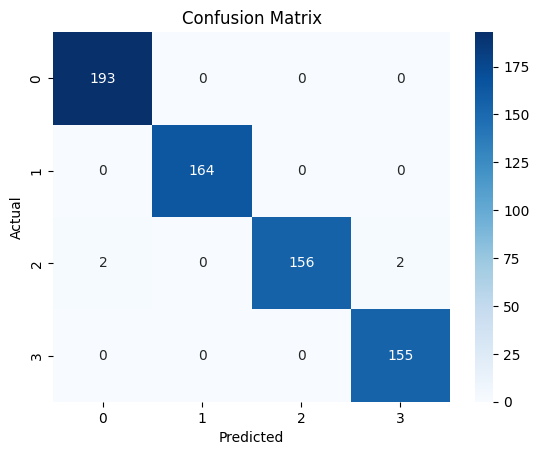

In [81]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Class distribution before removing class 1:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
Class distribution after re-encoding:
 2    840
0    102
1     53
3      4
Name: count, dtype: int64
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Accuracy: 0.9940476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           1       1.00      1.00      1.00       164
           2       1.00      0.97      0.99       160
           3       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672

AUC-ROC: 0.9993897093773139


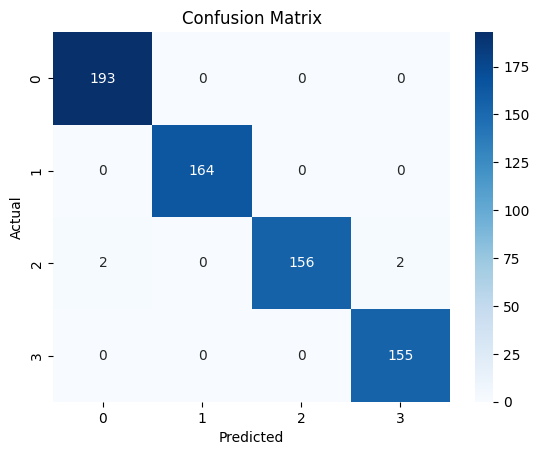

In [83]:
#Gradient Boosting Machines (GBM)
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print("Class distribution before removing class 1:\n", class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Re-encode the class labels to make them consecutive integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the class distribution again
class_counts = pd.Series(y).value_counts()
print("Class distribution after re-encoding:\n", class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the XGBoost model with StratifiedKFold
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)
y_pred_prob = best_xgb.predict_proba(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Class distribution before removing class 1:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
Class distribution after re-encoding:
 2    840
0    102
1     53
3      4
Name: count, dtype: int64
Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2203
[LightGBM] [Info] Number of data points in the train set: 2688, number of used features: 11
[LightGBM] [Info] Start training from score -1.424206
[LightGBM] [Info] Start training from score -1.380360
[LightGBM] [Info] Start training from score -1.374460
[LightGBM] [Info] Start training from score -1.367134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

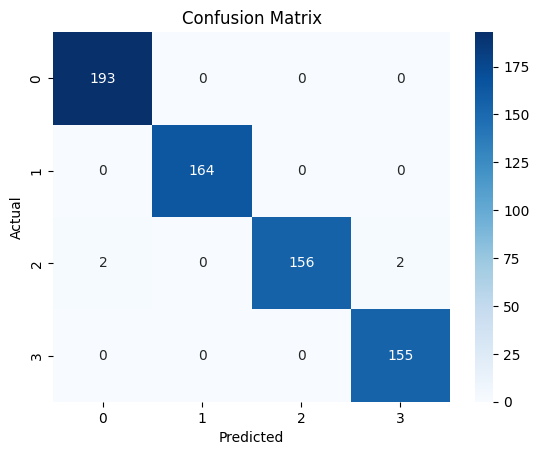

In [85]:
#LightGBM
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print("Class distribution before removing class 1:\n", class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Re-encode the class labels to make them consecutive integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the class distribution again
class_counts = pd.Series(y).value_counts()
print("Class distribution after re-encoding:\n", class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the LightGBM model with StratifiedKFold
lgbm = LGBMClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_lgbm = grid_search.best_estimator_

# Predictions
y_pred = best_lgbm.predict(X_test)
y_pred_prob = best_lgbm.predict_proba(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


Class distribution before removing class 1:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
Class distribution after re-encoding:
 2    840
0    102
1     53
3      4
Name: count, dtype: int64
Epoch 1/100
84/84 - 4s - loss: -1.8296e+01 - accuracy: 0.2868 - val_loss: -1.6094e+00 - val_accuracy: 0.2500 - 4s/epoch - 51ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 - 1s - loss: -1.7715e+02 - accuracy: 0.3341 - val_loss: -1.7652e+01 - val_accuracy: 0.2455 - 622ms/epoch - 7ms/step
Epoch 3/100
84/84 - 1s - loss: -7.3236e+02 - accuracy: 0.3118 - val_loss: -6.4863e+01 - val_accuracy: 0.2500 - 607ms/epoch - 7ms/step
Epoch 4/100
84/84 - 1s - loss: -1.9702e+03 - accuracy: 0.3092 - val_loss: -2.0117e+02 - val_accuracy: 0.2500 - 626ms/epoch - 7ms/step
Epoch 5/100
84/84 - 1s - loss: -4.1272e+03 - accuracy: 0.2731 - val_loss: -4.4463e+02 - val_accuracy: 0.2500 - 602ms/epoch - 7ms/step
Epoch 6/100
84/84 - 1s - loss: -7.5441e+03 - accuracy: 0.2586 - val_loss: -8.8417e+02 - val_accuracy: 0.2500 - 599ms/epoch - 7ms/step
Epoch 7/100
84/84 - 1s - loss: -1.2543e+04 - accuracy: 0.2530 - val_loss: -1.4933e+03 - val_accuracy: 0.2500 - 607ms/epoch - 7ms/step
Epoch 8/100
84/84 - 1s - loss: -1.8611e+04 - accuracy: 0.2522 - val_loss: -2.5262e+03 - val_accuracy: 0.2500 - 594ms/epoch - 7ms/step
Epoch 9/100
84/84 - 1s - loss: -2.7146e+04 - accuracy: 0.2496 - val_loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


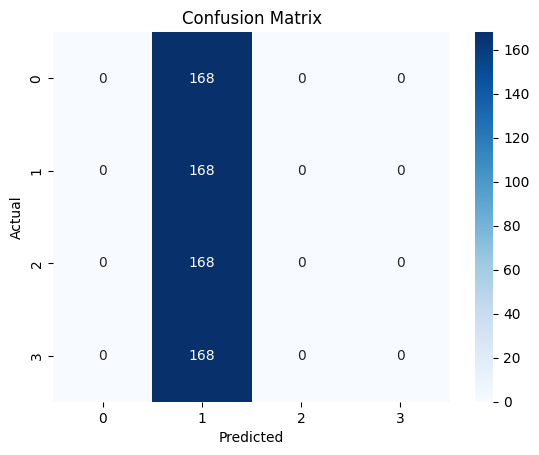

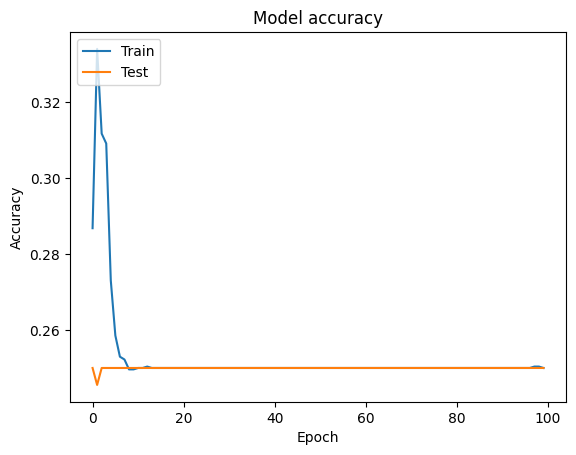

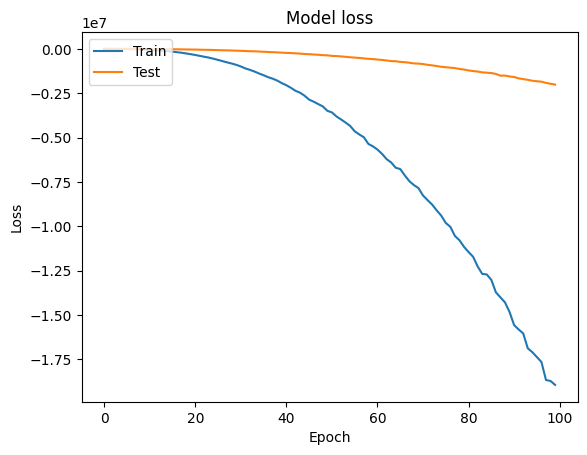

In [11]:
#CNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print("Class distribution before removing class 1:\n", class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Re-encode the class labels to make them consecutive integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the class distribution again
class_counts = pd.Series(y).value_counts()
print("Class distribution after re-encoding:\n", class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
def create_model(optimizer='adam', learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = optimizer

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Class weights
class_weights = {0: 1, 1: 2, 2: 2, 3: 10}

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2,
                    callbacks=[early_stopping, model_checkpoint], class_weight=class_weights)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [16]:
#CatBoost
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from catboost import CatBoostClassifier, Pool # CatBoost is now installed and can be imported
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print("Class distribution before removing class 1:\n", class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Re-encode the class labels to make them consecutive integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the class distribution again
class_counts = pd.Series(y).value_counts()
print("Class distribution after re-encoding:\n", class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the CatBoost model with StratifiedKFold
catboost = CatBoostClassifier(random_state=42, verbose=0) # Initialize CatBoost model
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 6, 9],
    # Remove 'subsample' from the parameter grid
    'colsample_bylevel': [0.6, 0.8, 1.0]
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train, cat_features=['Gender'])  # Specify categorical features here

# Best model
best_catboost = grid_search.best_estimator_

# Predictions
y_pred = best_catboost.predict(X_test)
y_pred_prob = best_catboost.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Class distribution before removing class 1:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
Class distribution after re-encoding:
 2    840
0    102
1     53
3      4
Name: count, dtype: int64
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy: 0.9925595238095238
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           1       0.99      1.00      1.00       164
           2       1.00      0.97      0.98       160
           3       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Accuracy: 0.9613095238095238
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       193
           2       0.96      1.00      0.98       164
           3       0.94      0.90      0.92       160
           4       0.97      0.94      0.95       155

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672



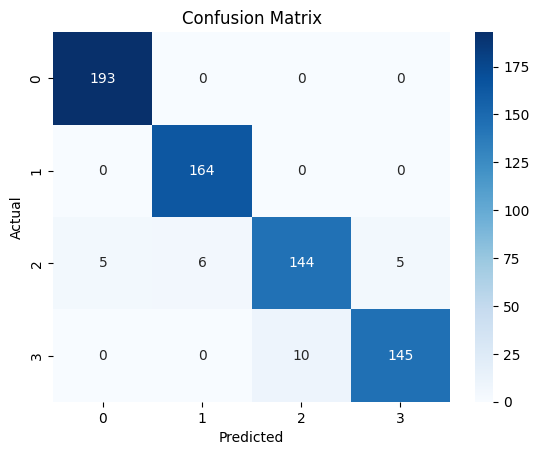

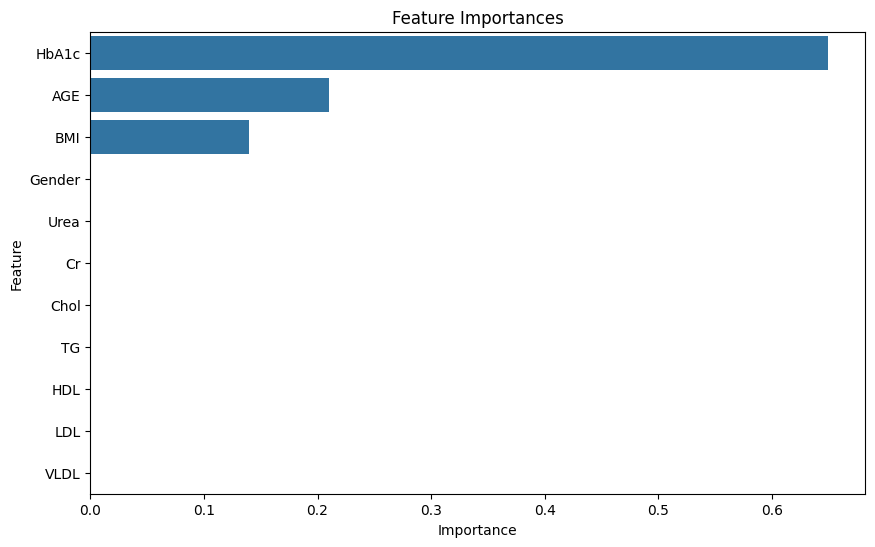

In [19]:
#AdaBoost
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the AdaBoost model with StratifiedKFold
adb = AdaBoostClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_adb = grid_search.best_estimator_

# Predictions
y_pred = best_adb.predict(X_test)
y_pred_prob = best_adb.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importances = best_adb.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Accuracy: 0.9851190476190477
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       193
           2       0.97      1.00      0.98       164
           3       1.00      0.94      0.97       160
           4       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.98      0.98       672
weighted avg       0.99      0.99      0.99       672



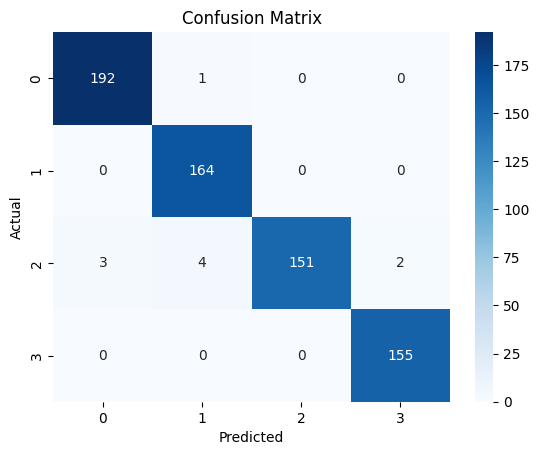

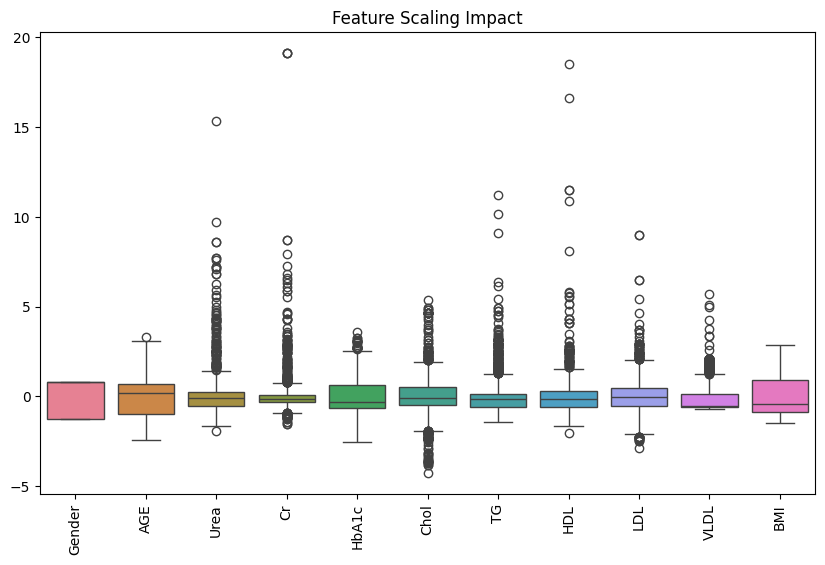

In [23]:
# K-Nearest Neighbors (KNN)
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model with StratifiedKFold
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

# Predictions
y_pred = best_knn.predict(X_test)
y_pred_prob = best_knn.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (not applicable for KNN, but we can analyze feature scaling impact)
feature_names = X.columns
scaled_features = pd.DataFrame(X_train, columns=feature_names)
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_features)
plt.title('Feature Scaling Impact')
plt.xticks(rotation=90)
plt.show()


Class distribution before removing class 1:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
Class distribution after removing class 1:
 CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       193
           2       0.86      0.99      0.92       164
           3       0.97      0.86      0.91       160
           4       0.94      0.99      0.96       155

    accuracy                           0.94       672
   macro avg       0.94      0.94      0.94       672
weighted avg       0.94      0.94      0.94       672



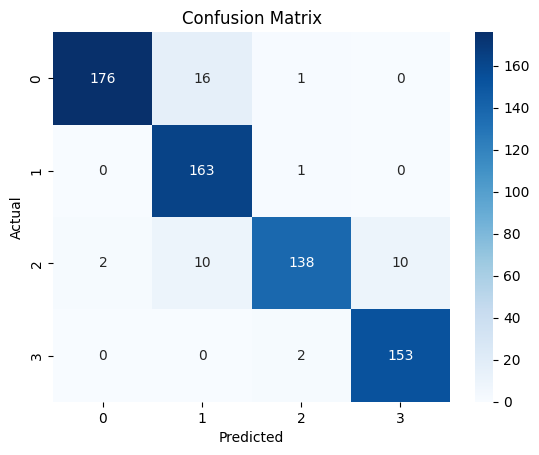

In [22]:
#Logistic Regression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print("Class distribution before removing class 1:\n", class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print("Class distribution after removing class 1:\n", class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with StratifiedKFold
log_reg = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
strat_kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=strat_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_log_reg = grid_search.best_estimator_

# Predictions
y_pred = best_log_reg.predict(X_test)
y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64
Naive Bayes Model:
Accuracy: 0.9196428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       193
           2       0.96      0.97      0.96       164
           3       0.94      0.79      0.86       160
           4       0.84      1.00      0.91       155

    accuracy                           0.92       672
   macro avg       0.92      0.92      0.92       672
weighted avg       0.92      0.92      0.92       672



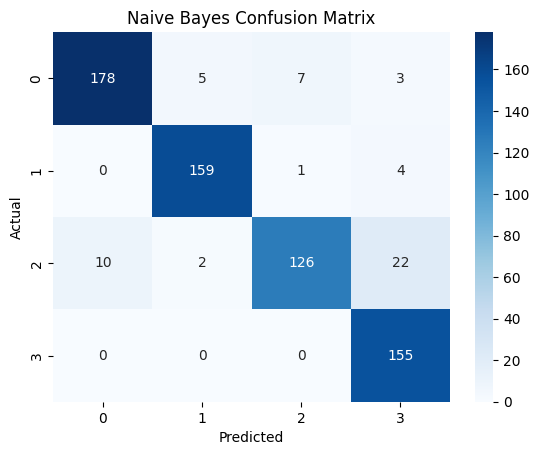

In [25]:
#Naive Bayes model
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

# Evaluation
print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network (MLPClassifier) Model:
Accuracy: 0.9910714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           2       0.99      1.00      0.99       164
           3       0.99      0.97      0.98       160
           4       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



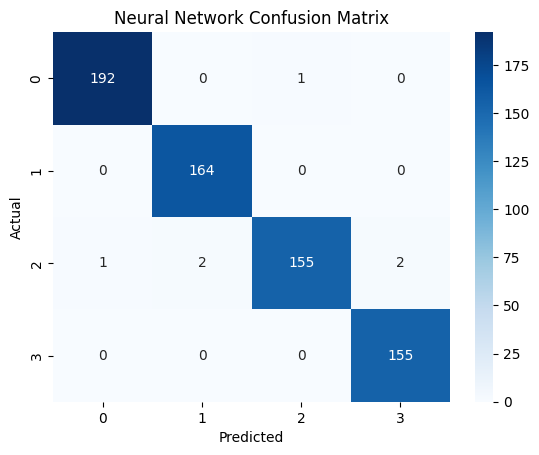

In [27]:
#Neural Network (Multilayer Perceptron) model
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the MLPClassifier (Neural Network)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Evaluation
print("Neural Network (MLPClassifier) Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64
Decision Tree Model:
Accuracy: 0.9910714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           2       1.00      1.00      1.00       164
           3       0.99      0.97      0.98       160
           4       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672

AUC-ROC is not applicable for Decision Tree model.


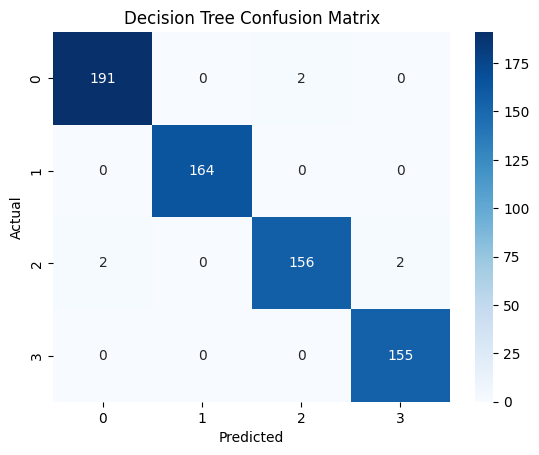

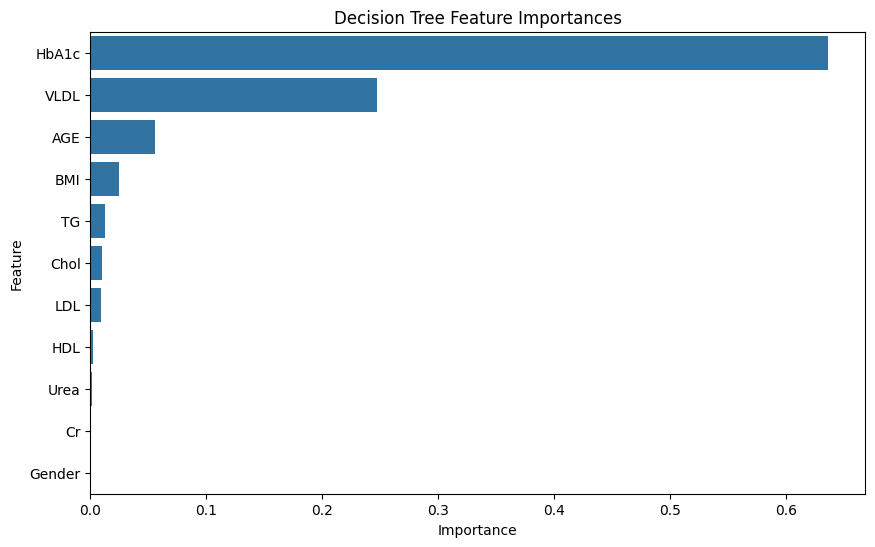

In [29]:
#Decision Tree model
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]  # Decision trees don't directly provide probabilities

# Evaluation
print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
# Decision trees don't have predict_proba method for probability scores
print("AUC-ROC is not applicable for Decision Tree model.")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Feature Importance
importances = dt.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Decision Tree Feature Importances')
plt.show()


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
4      4
Name: count, dtype: int64
Gradient Boosting Classifier Model:
Accuracy: 0.9940476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           2       1.00      1.00      1.00       164
           3       1.00      0.97      0.99       160
           4       0.99      1.00      0.99       155

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



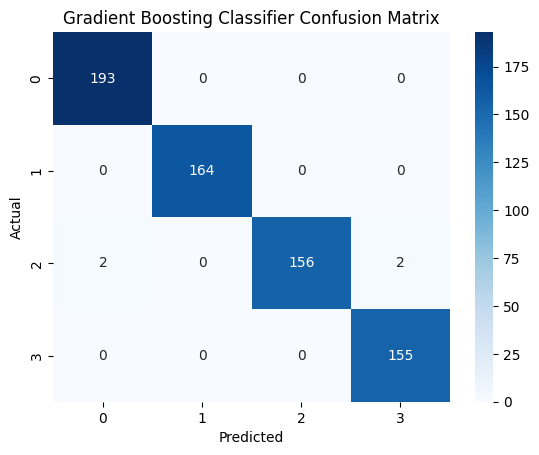

In [31]:
#Gradient Boosting Classifier Model
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove the extremely small class
data = data[y != 1]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE (with adjusted k_neighbors) and RandomUnderSampler
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X, y)

under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under.fit_resample(X_smote, y_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Classifier Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()


In [34]:
#K-Means Clustering Model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit k-Means clustering model
k = 2  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and assign them to original dataset
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels

# Visualize the clusters (for 2D or 3D data)
# For simplicity, let's assume X has 2 or 3 features for visualization
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=cluster_labels, palette='Set1', s=100, alpha=0.8, legend='full')
    plt.title('k-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
elif X.shape[1] == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=cluster_labels, cmap='Set1', s=100, alpha=0.8)
    ax.set_title('k-Means Clustering')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.show()

# Print cluster centers (centroid values)
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 0.47933884 42.65289256  4.60702479 63.58264463  5.55165289  4.72727273
   1.91942149  1.2196281   2.70929752  1.34917355 23.61421488]
 [ 0.59498681 57.          5.29003034 70.65435356  9.15258575  4.90609499
   2.48695251  1.2         2.57802111  2.01609499 31.48203166]]


In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit k-Means clustering model
k = 2  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Print cluster centers (centroid values)
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))  # Inverse transform to original scale

# Print Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.15949506273980926
Cluster Centers:
[[ 0.47933884 42.65289256  4.60702479 63.58264463  5.55165289  4.72727273
   1.91942149  1.2196281   2.70929752  1.34917355 23.61421488]
 [ 0.59498681 57.          5.29003034 70.65435356  9.15258575  4.90609499
   2.48695251  1.2         2.57802111  2.01609499 31.48203166]]
Within-Cluster Sum of Squares (WCSS): 9614.68268592302


Base Random Forest Model:
Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           2       1.00      1.00      1.00         6
           3       0.99      0.99      0.99       172
           4       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.98      0.98      0.98       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


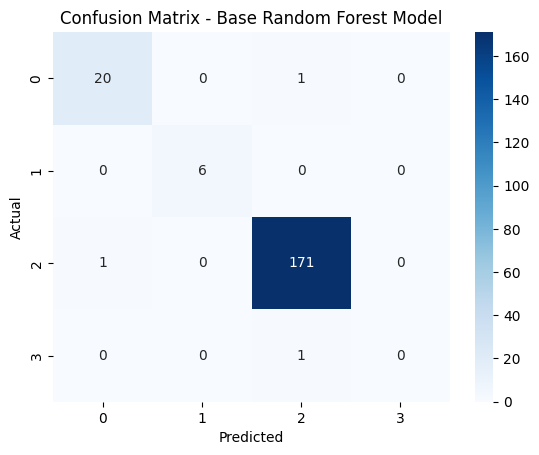

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model with Random Forest Base Estimator:
Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           2       1.00      1.00      1.00         6
           3       0.99      0.99      0.99       172
           4       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.98      0.98      0.98       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


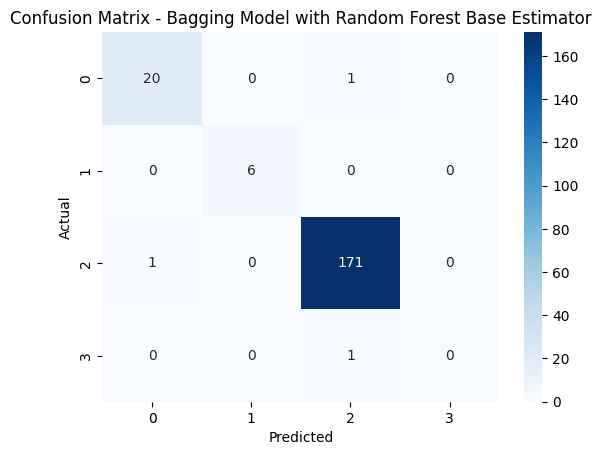

In [37]:
#Bagging (Bootstrap Aggregating) model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

# Predictions using the base Random Forest model
y_pred_base = rf_base.predict(X_test)
y_pred_prob_base = rf_base.predict_proba(X_test)[:, 1]

# Evaluation of base Random Forest model
print("Base Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("Classification Report:\n", classification_report(y_test, y_pred_base))


# Confusion Matrix
conf_matrix_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Base Random Forest Model')
plt.show()

# Bagging (Bootstrap Aggregating) with Random Forest base estimator
bagging_rf = BaggingClassifier(base_estimator=rf_base, n_estimators=10, random_state=42)
bagging_rf.fit(X_train, y_train)

# Predictions using the Bagging model
y_pred_bagging = bagging_rf.predict(X_test)
y_pred_prob_bagging = bagging_rf.predict_proba(X_test)[:, 1]

# Evaluation of Bagging model
print("Bagging Model with Random Forest Base Estimator:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))


# Confusion Matrix
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bagging Model with Random Forest Base Estimator')
plt.show()
